### PyBIDS tutorial

Based on the [original PyBIDS tutorial](https://bids-standard.github.io/pybids/examples/pybids_tutorial.html)

Using [ds004107](https://openneuro.org/datasets/ds004107) from OpenNeuro.  

Here is the abstract from the [original publication](https://www.sciencedirect.com/science/article/pii/S0531513107000623):

> Pooling of magnetoencephalography (MEG) data across laboratories is non-trivial because of differences in hardware, software, and environmental noise levels. To investigate these issues, we conducted a study with the same five subjects at three sites with different MEG arrays: Elekta-Neuromag Vectorview (Boston), VSM MedTech Omega 275 (Albuquerque), and 4D Neuroimaging Magnes 3600 WH (Minneapolis). Subjects were run in a simple somatosensory paradigm. Phantom data were also taken at each site. We developed software to allow comparisons of test/retest reliability across subjects, machines, and analysis methods. Preliminary analyses showed excellent test/retest results within subjects across instruments. Analysis of phantom data showed a localization error of less than 2 mm across multiple software packages. Our results show that (1) instruments from different manufacturers yield similar results for somatosensory data, and that (2) multiple software packages produce very accurate results for simple source configurations.


In [128]:
import bids
import mne
import numpy as np

In [3]:
bids_dir = '/Users/poldrack/data_unsynced/ds004107-download'
layout = bids.BIDSLayout(bids_dir)

In [4]:
layout

BIDS Layout: ...ata_unsynced/ds004107-download | Subjects: 9 | Sessions: 29 | Runs: 0

In [11]:
layout.get_subjects()

['emptyroom',
 'mind002',
 'mind003',
 'mind004',
 'mind006',
 'mind007',
 'mind008',
 'mind009',
 'mind010']

In [16]:
layout.get_tasks()

['noise', 'auditory', 'index', 'median', 'rest', 'visual']

Get an overview of all of the files

In [5]:
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 10 files are:")
all_files[:10]

There are 397 files in the layout.

The first 10 files are:


[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/CHANGES'>,
 <BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/dataset_description.json'>,
 <BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/participants.json'>,
 <BIDSDataFile filename='/Users/poldrack/data_unsynced/ds004107-download/participants.tsv'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/README'>,
 <BIDSDataFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_channels.tsv'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.fif'>,
 <BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.json'>,
 <BIDSDataFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-1

Each item is a BIDSFile object, but we can also get the filenames directly:

In [7]:
layout.get(return_type='filename')[:10]

['/Users/poldrack/data_unsynced/ds004107-download/CHANGES',
 '/Users/poldrack/data_unsynced/ds004107-download/dataset_description.json',
 '/Users/poldrack/data_unsynced/ds004107-download/participants.json',
 '/Users/poldrack/data_unsynced/ds004107-download/participants.tsv',
 '/Users/poldrack/data_unsynced/ds004107-download/README',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_channels.tsv',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.json',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/sub-emptyroom_ses-19121026_scans.tsv',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121027/meg/sub-emptyroom_ses-19121027_task-noise_channels.tsv']

### Filtering files by entities

In [12]:
# Retrieve filenames of all BOLD runs for subject 01
layout.get(subject='mind002', extension='fif', suffix='meg', return_type='filename')



['/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-index_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-median_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-rest_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-index_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-median_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses


If you're wondering what entities you can pass in as filtering arguments, the answer is contained in the `.json` configuration files [housed here](https://github.com/bids-standard/pybids/tree/master/bids/layout/config). To save you the trouble, here are a few of the most common entities:

* `suffix`: The part of a BIDS filename just before the extension (e.g., `'bold'`, `'events'`, `'physio'`, etc.).
* `subject`: The subject label
* `session`: The session label
* `run`: The run index
* `task`: The task name

You can also use a list instead of a single value:

In [29]:
mind_subjects = [i for i in layout.get_subjects() if 'mind' in i]
layout.get(subject=mind_subjects, task=['visual', 'auditory'], 
           extension='fif', suffix='meg', return_type='filename')


['/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-02/meg/sub-mind003_ses-02_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-02/meg/sub-mind003_ses-02_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-01/meg/sub-min

### Filtering by metadata
All of the entities listed above are found in the names of BIDS files. But sometimes we want to search for files based not just on their names, but also based on metadata defined (per the BIDS spec) in JSON files. Fortunately for us, when we initialize a `BIDSLayout`, all metadata files associated with BIDS files are automatically indexed. This means we can pass any key that occurs in any JSON file in our project as an argument to `.get()`. We can combine these with any number of core BIDS entities (like `subject`, `run`, etc.).

For example, say we want to retrieve all files where (a) the value of `Manufacturer` (a metadata key) is `Elekta`, (b) the task name is `'auditory'`, and (c) the subject starts with `mind`. Here's how we can do that:


In [34]:
layout.get(subject=mind_subjects, Manufacturer='Elekta', task='auditory')

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-02/meg/sub-mind003_ses-02_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-01/meg/sub-mind004_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-02/meg/sub-mind004_ses-02_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind006/ses-01/meg/sub-mind006_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsync


### Other `return_type` values
While we'll typically want to work with either `BIDSFile` objects or filenames, we can also ask `get()` to return unique values (or ids) of particular entities. For example, say we want to know which subjects have at least one `T1w` file. We can request that information by setting `return_type='id'`. When using this option, we also need to specify a target entity (or metadata keyword) called `target`. This combination tells the `BIDSLayout` to return the unique values for the specified `target` entity. For example, in the next example, we ask for all of the unique subject IDs that have at least one file with a `T1w` suffix:



In [18]:
# Ask get() to return the ids of subjects that have T1w files
layout.get(return_type='id', target='subject', suffix='T1w')

['mind002',
 'mind003',
 'mind004',
 'mind006',
 'mind007',
 'mind008',
 'mind009',
 'mind010']

## The `BIDSFile`
When you call `.get()` on a `BIDSLayout`, the default returned values are objects of class `BIDSFile`. A `BIDSFile` is a lightweight container for individual files in a BIDS dataset. It provides easy access to a variety of useful attributes and methods. Let's take a closer look. First, let's pick a random file from our existing `layout`.





In [35]:
# Pick the 6th file in the dataset
bf = layout.get()[6]

# Print it
bf

<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.fif'>


Here are some of the attributes and methods available to us in a `BIDSFile` (note that some of these are only available for certain subclasses of `BIDSFile`; e.g., you can't call `get_image()` on a `BIDSFile` that doesn't correspond to an image file!):
* `.path`: The full path of the associated file
* `.filename`: The associated file's filename (without directory)
* `.dirname`: The directory containing the file
* `.get_entities()`: Returns information about entities associated with this `BIDSFile` (optionally including metadata)
* `.get_image()`: Returns the file contents as a nibabel image (only works for image files)
* `.get_df()`: Get file contents as a pandas DataFrame (only works for TSV files)
* `.get_metadata()`: Returns a dictionary of all metadata found in associated JSON files
* `.get_associations()`: Returns a list of all files associated with this one in some way

Let's see some of these in action.



In [22]:
# Print all the entities associated with this file, and their values
bf.get_entities()

{'datatype': 'meg',
 'extension': '.fif',
 'session': '19121026',
 'subject': 'emptyroom',
 'suffix': 'meg',
 'task': 'noise'}

In [23]:
# Print all the metadata associated with this file
bf.get_metadata()

{'ContinuousHeadLocalization': False,
 'DewarPosition': 'n/a',
 'DigitizedHeadPoints': True,
 'DigitizedLandmarks': True,
 'ECGChannelCount': 0,
 'EEGChannelCount': 0,
 'EMGChannelCount': 0,
 'EOGChannelCount': 2,
 'HeadCoilFrequency': [],
 'MEGChannelCount': 306,
 'MEGREFChannelCount': 0,
 'Manufacturer': 'Elekta',
 'MiscChannelCount': 0,
 'PowerLineFrequency': 60.0,
 'RecordingDuration': 309.7570297537584,
 'RecordingType': 'continuous',
 'SamplingFrequency': 1792.8858642578125,
 'SoftwareFilters': {'SpatialCompensation': {'GradientOrder': 0}},
 'TaskName': 'noise',
 'TriggerChannelCount': 9}

In [24]:
# We can the union of both of the above in one shot like this
bf.get_entities(metadata='all')

{'ContinuousHeadLocalization': False,
 'DewarPosition': 'n/a',
 'DigitizedHeadPoints': True,
 'DigitizedLandmarks': True,
 'ECGChannelCount': 0,
 'EEGChannelCount': 0,
 'EMGChannelCount': 0,
 'EOGChannelCount': 2,
 'HeadCoilFrequency': [],
 'MEGChannelCount': 306,
 'MEGREFChannelCount': 0,
 'Manufacturer': 'Elekta',
 'MiscChannelCount': 0,
 'PowerLineFrequency': 60.0,
 'RecordingDuration': 309.7570297537584,
 'RecordingType': 'continuous',
 'SamplingFrequency': 1792.8858642578125,
 'SoftwareFilters': {'SpatialCompensation': {'GradientOrder': 0}},
 'TaskName': 'noise',
 'TriggerChannelCount': 9,
 'datatype': 'meg',
 'extension': '.fif',
 'session': '19121026',
 'subject': 'emptyroom',
 'suffix': 'meg',
 'task': 'noise'}

Here are all the files associated with our target file in some way. Notice how we get back both the JSON sidecar for our target file.


In [25]:
associated_files = bf.get_associations()
associated_files

[<BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.json'>]

## Using PyBIDS for an analysis

Let's say that we want to create a plot showing signals for left and right hemisphere tone stimulation.  

In [174]:
# Setup for reading the raw data
raw_fname = layout.get(subject='mind002', task='auditory', extension='fif', suffix='meg')[0]
raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.filter(1, 25)


Opening raw data file <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif'>...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 63240 ... 1656639 =     50.592 ...  1325.311 secs
Ready.
Reading 0 ... 1593399  =      0.000 ...  1274.719 secs...


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_98596/1921726042.py:3: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 4125 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.7s


Measurement date,"October 26, 1912 16:30:04 GMT"
Experimenter,mne_anonymize
Participant,0
Digitized points,136 points
Good channels,"204 Gradiometers, 102 Magnetometers, 9 Stimulus, 2 EOG"
Bad channels,None
EOG channels,"EOG 061, EOG 062"
ECG channels,Not available
Sampling frequency,1250.00 Hz
Highpass,1.00 Hz
Lowpass,25.00 Hz


In [201]:
# load events.tsv file

events_file = layout.get(subject='mind003', task='auditory', extension='tsv', suffix='events')[0]
events_df = events_file.get_df()
print(events_df.shape)
events_df.head()


(850, 5)


,onset,duration,trial_type,value,sample
0,3.8728,0.0,right/tone/2500,11,4841
1,5.3744,0.0,right/tone/2500,11,6718
2,6.6744,0.0,left/tone/2500,9,8343
3,8.1752,0.0,left/tone/2500,9,10219
4,9.5760,0.0,right/noise,35,11970


In [202]:
# get event type dict
event_dict = {}
trial_types = events_df['trial_type'].unique()
for i, trial_type in enumerate(trial_types):
    event_dict[trial_type] = events_df.query(f'trial_type == "{trial_type}"')['value'].values[0]

event_dict

{'right/tone/2500': 11,
 'left/tone/2500': 9,
 'right/noise': 35,
 'right/tone/500': 7,
 'right/tone/4000': 19,
 'left/tone/4000': 17,
 'left/tone/500': 5,
 'left/noise': 33}

Some data exploration showed that STIM 014 contains all of the relevant events for all conditions.

In [203]:
events =  mne.find_events(raw, stim_channel='STI 014')
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)

evoked = {key:epochs[key].average() for key in epochs.event_id.keys()}

850 events found on stim channel STI 014
Event IDs: [ 5  7  9 11 17 19 33 35]
Not setting metadata
850 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 850 events and 1251 original time points ...
0 bad epochs dropped


In [204]:
[evoked[k] for k in evoked.keys() if 'left/tone' in k]

[<Evoked | 'left/tone/2500' (average, N=108), -0.3 – 0.7 s, baseline -0.3 – 0 s, 306 ch, ~9.1 MB>,
 <Evoked | 'left/tone/4000' (average, N=100), -0.3 – 0.7 s, baseline -0.3 – 0 s, 306 ch, ~9.1 MB>,
 <Evoked | 'left/tone/500' (average, N=109), -0.3 – 0.7 s, baseline -0.3 – 0 s, 306 ch, ~9.1 MB>]

In [205]:
# combine across tone conditions

left_tone = mne.combine_evoked([evoked[k] for k in evoked.keys() if 'left/tone' in k], weights="nave")
right_tone = mne.combine_evoked([evoked[k] for k in evoked.keys() if 'right/tone' in k], weights="nave")

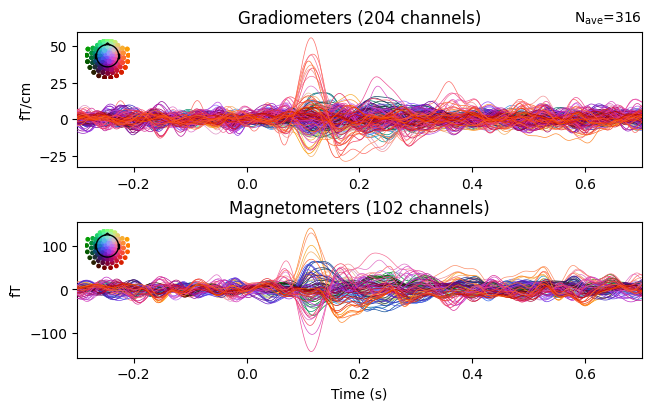

In [206]:
_ = left_tone.plot()

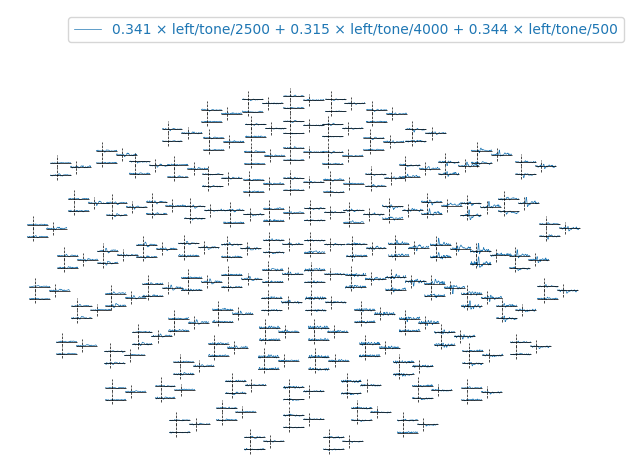

In [212]:
times = np.linspace(0.05, 0.4, 8)
_ = left_tone.plot_topo()

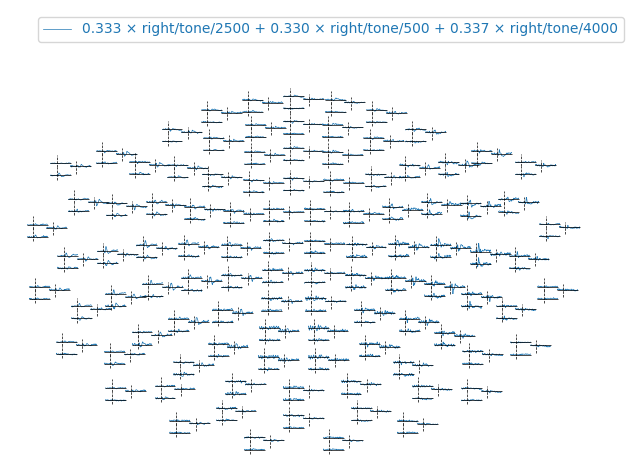

In [213]:

_ = right_tone.plot_topo() #map(times=times)